In [ ]:
# Pick up package from parent folder
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
parent2dir = os.path.dirname(parentdir)
sys.path.insert(0,parentdir)
sys.path.insert(0,parent2dir)

In [9]:
import skltemplate
from skltemplate import OrderedProbitRanker

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.utils.testing import assert_array_equal, assert_allclose, assert_raises
import numpy as np
import pandas as pd

In [83]:
X_m, y_m = make_blobs(n_samples=300, random_state=0)
X_m, y_m = shuffle(X_m, y_m, random_state=7)
X_m = StandardScaler().fit_transform(X_m)
# generate binary problem from multi-class one
y_b = y_m[y_m != 2]
X_b = X_m[y_m != 2]

for (X, y) in [(X_m, y_m), (X_b, y_b)]:
    classes = np.unique(y)
    n_classes = len(classes)
    n_samples, n_features = X.shape
    classifier = OrderedProbitRanker(fit_intercept=True)
    # fit
    classifier.fit(X, y)
    # with lists
    classifier.fit(X.tolist(), y.tolist())
    assert hasattr(classifier, "classes_")
    y_pred = classifier.predict(X)
    assert y_pred.shape == (n_samples,)
    
    # training set performance
#     assert accuracy_score(y, y_pred) > 0.83
    
    # predict_proba agrees with predict
    y_prob = classifier.predict_proba(X)
    assert y_prob.shape == (n_samples, n_classes)
    assert_array_equal(np.argmax(y_prob, axis=1), y_pred)
    # check that probas for all classes sum to one
    assert_allclose(np.sum(y_prob, axis=1), np.ones(n_samples))
    with assert_raises(ValueError, msg="The classifier {} does not"
                       " raise an error when the number of "
                       "features in predict_proba is different "
                       "from the number of features in fit."
                       .format("op")):
        classifier.predict_proba(X.T)

In [84]:
print(((y - y_pred) == 0).mean())
print(classifier.coef_)
print(classifier.intercept_)
print(classifier.cuts_)

1.0
[ 6.71474148 -6.3379798 ]
-0.33465462260698986
[-0.80781761]


Problem here is that randomstate=0 for make_blobs makes very unordered classes

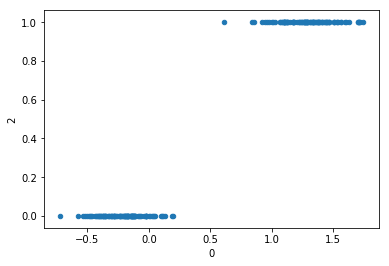

In [86]:
pd.DataFrame(np.concatenate((X,y.reshape((200,1))), axis=1)).plot(x=0, y=2, kind='scatter')